In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns

In this notebook, we're going to do some machine learning.  All of it : 1) classification, 2) regression, 3) clustering.  

We'll go through 
* Defining the test and train data
* For each approach:
 * Fitting a model
 * Assessing the results with different metrics
     * Cross validation
     * ROC
     * and so on
 * Refining the hyperparameters

## Load the data

In [88]:
# import some data to play with
iris = datasets.load_iris()

x = iris.data
y = iris.target
# array version

In [92]:
import random

order = range(len(y))
random.shuffle(order)

# shuffle samples since they are ordered
x = x[order,:]
y = y[order]

In [93]:
iris_sb = sns.load_dataset("iris")
iris_sb.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Feature Engineering

[[-0.36158968  0.08226889 -0.85657211 -0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [ 0.58099728 -0.59641809 -0.07252408 -0.54906091]
 [-0.31725455  0.32409435  0.47971899 -0.75112056]]
[0.92461621 0.05301557 0.01718514 0.00518309]


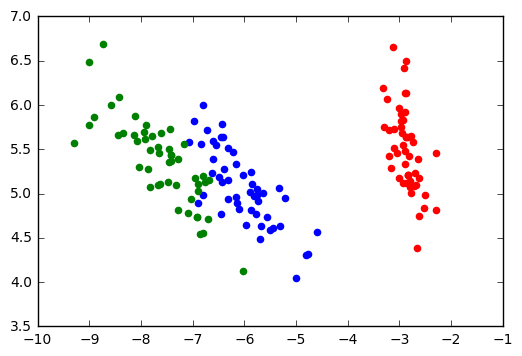

In [94]:
# PCA
from sklearn.decomposition import PCA
import itertools

pca = PCA()
pca.fit(x)
print(pca.components_) # each row is a prin comp
print(pca.explained_variance_ratio_)

w = np.matmul(x, pca.components_[:2,:].transpose())


colors = itertools.cycle(["r", "b", "g"])
plt.figure(1)
for i in range(3):
    plt.scatter(w[y==i,0],w[y==i,1], color=next(colors))
    

[[-0.36158968  0.08226889 -0.85657211 -0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]


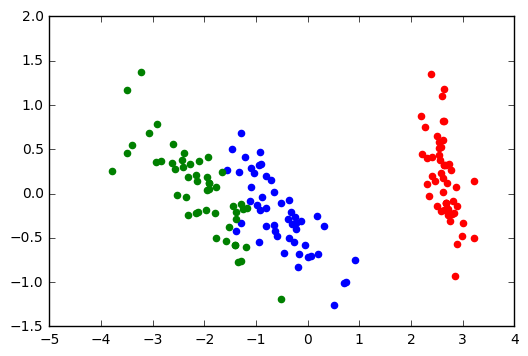

In [95]:
pca = PCA(n_components=2)
pca.fit(x)
print(pca.components_) # each row is a prin comp

w = pca.transform(x) # same as above but rescales 

colors = itertools.cycle(["r", "b", "g"])
plt.figure(1)
for i in range(3):
    plt.scatter(w[y==i,0],w[y==i,1], color=next(colors))
    
# w is the final feature vector

# Clustering

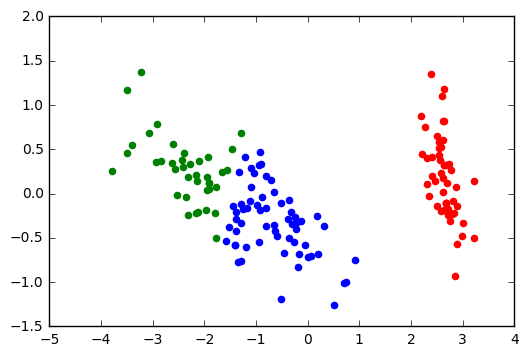

In [96]:
# Kmeans 
from sklearn.cluster import KMeans
    
kmeans = KMeans(n_clusters=3, random_state=0).fit(w)
l = kmeans.labels_
#print(y)
#print(kmeans.labels_)

plt.figure(2)
colors = itertools.cycle(["r", "b", "g"])
for i in range(3):
    plt.scatter(w[l==i,0],w[l==i,1], color=next(colors))

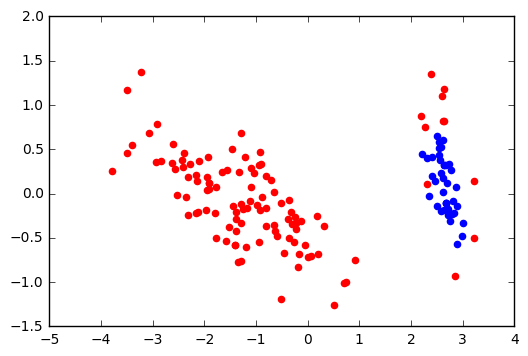

In [97]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=15).fit(w)
#print(db.labels_)
#print(y)
l = db.labels_

plt.figure(2)
colors = itertools.cycle(["r", "b", "g", "k", "m"])
for i in np.unique(l):
    plt.scatter(w[l==i,0],w[l==i,1], color=next(colors))



# Regression

In this section we'll try to predict the 4th feature as if it's a regression problem.

[-0.20046458  0.26076788  0.53212463]
0.03391110174759042
0.944589703026813


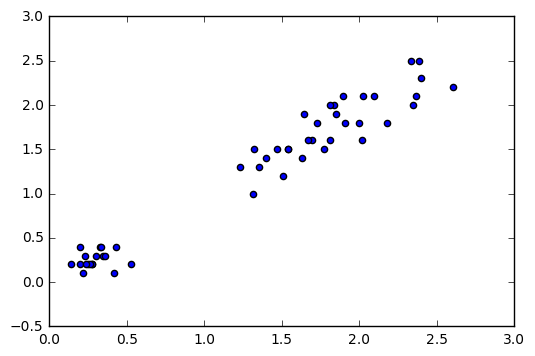

In [99]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

data_train = x[:100,0:3]
result_train = x[:100,3]

data_test = x[100:,0:3]
result_test = x[100:,3]

reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(data_train, result_train)
print(reg.coef_)

plt.scatter(reg.predict(data_test), result_test)
print(mean_squared_error(result_test, reg.predict(data_test)))
print(r2_score(result_test, reg.predict(data_test)))  # pretty good

[0.         0.         0.39062939]
0.03574623274412204
0.9415911229671209


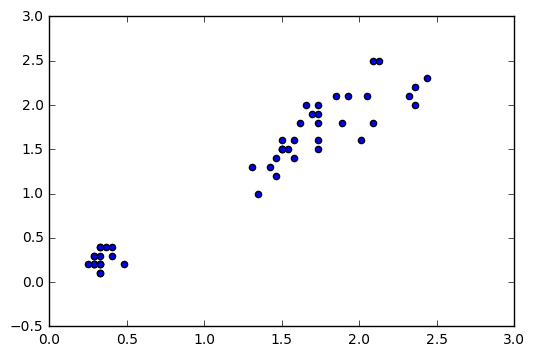

In [101]:
# Ridge and Lasso
# LASSO only

data_train = x[:100,0:3]
result_train = x[:100,3]

data_test = x[100:,0:3]
result_test = x[100:,3]

reg = linear_model.Lasso(alpha = 0.1)
reg.fit(data_train, result_train)
print(reg.coef_)

plt.scatter(reg.predict(data_test), result_test)
print(mean_squared_error(result_test, reg.predict(data_test)))
print(r2_score(result_test, reg.predict(data_test)))  # great

# The result is MUCH more sparse, only uses feat 3

# Classification

In [128]:
# Logistic regression classification
from sklearn import linear_model
from sklearn.metrics import f1_score

#scaler = StandardScaler()
#scaler.fit(x) 
#x_scaled = scaler.transform(x)

# x and y are the data
x_train = x[:100]
y_train = y[:100]

x_test = x[100:]
y_test = y[100:]

logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(x_train, y_train)

#print(logreg.predict(x_test))
print(logreg.score(x_test, y_test)) # 94% accurate, not bad

print(f1_score(y_test, logreg.predict(x_test), average=None))

#feature_importance = abs(logreg.coef_[0])
#feature_importance = 100.0 * (feature_importance / feature_importance.max())
#feature_importance

0.94
[1.         0.88888889 0.91891892]


# Automate the selection of a model

In [119]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "AdaBoost", "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=4),
    RandomForestClassifier(max_depth=2, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

# iterate over classifiers
for name, clf in zip(names, classifiers):
    print(name)
    
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))
    print(f1_score(y_test, clf.predict(X_test), average=None))
    try:
        print(clf.feature_importances_)
    except AttributeError:
        print()
    print()

Nearest Neighbors
0.9333333333333333
[1.         0.91891892 0.86956522]
()
()
Linear SVM
0.9111111111111111
[1.         0.88888889 0.83333333]
()
()
RBF SVM
0.9333333333333333
[1.         0.91891892 0.86956522]
()
()
Decision Tree
0.9111111111111111
[1.         0.89473684 0.81818182]
[0.02152227 0.         0.41713422 0.5613435 ]
()
Random Forest
0.9111111111111111
[1.         0.89473684 0.81818182]
[0.21828186 0.09107865 0.25931574 0.43132375]
()
AdaBoost
0.9111111111111111
[1.         0.89473684 0.81818182]
[0.02 0.02 0.5  0.46]
()
Naive Bayes
0.9333333333333333
[1.         0.92307692 0.85714286]
()
()
QDA
0.9555555555555556
[1.         0.94444444 0.91666667]
()
()
